## Bussiness case
#### Create a predictive model to forecast the Covid19 cases based on past cases for a specific country or region.

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
%matplotlib inline

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# html embedding
from IPython.display import Javascript
from IPython.core.display import display, HTML

# set formatting
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

print("Setup Complete")

Setup Complete


In [18]:
yesterday = datetime.today() - timedelta(days=1)
yesterday = yesterday.strftime('%m-%d-%Y')

In [19]:
yesterday

'03-02-2023'

In [20]:
confirmed =pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths =pd.read_csv('time_series_covid19_deaths_global.csv')
recovered=pd.read_csv('time_series_covid19_recovered_global.csv')

In [21]:
confirmed.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alberta,British Columbia,Diamond Princess,Grand Princess,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Ontario,Prince Edward Island,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anguilla,Bermuda,British Virgin Islands,Cayman Islands,Channel Islands,Falkland Islands (Malvinas),Gibraltar,Isle of Man,Montserrat,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Lat,33.93911,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,-12.4634,-27.4698,-34.9285,-42.8821,-37.8136,-31.9505,47.5162,40.1431,25.025885,26.0275,23.685,13.1939,53.7098,50.8333,17.1899,9.3077,27.5142,-16.2902,43.9159,-22.3285,-14.235,4.5353,42.7339,12.2383,21.9162,-3.3731,16.5388,11.55,3.848,53.9333,53.7267,0.0,0.0,53.7609,46.5653,53.1355,64.8255,44.682,51.2538,46.5107,...,14.4974,44.0165,-4.6796,8.460555,1.2833,48.669,46.1512,5.152149,-30.5595,6.877,40.463667,7.873054,12.8628,3.9193,60.128161,46.8182,34.802075,23.7,38.861,-6.369028,15.870032,-8.874217,8.6195,10.6918,33.886917,38.9637,40.0,1.373333,48.3794,23.424076,18.2206,32.3078,18.4207,19.3133,49.3723,-51.7963,36.1408,54.2361,16.742498,21.694,55.3781,-32.5228,41.377491,6.4238,14.058324,31.9522,24.2155,15.552727,-13.133897,-19.015438
Long,67.709953,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.0124,151.2093,130.8456,153.0251,138.6007,147.3272,144.9631,115.8605,14.5501,47.5769,-78.035889,50.55,90.3563,-59.5432,27.9534,4.469936,-88.4976,2.3158,90.4336,-63.5887,17.6791,24.6849,-51.9253,114.7277,25.4858,-1.5616,95.956,29.9189,-23.0418,104.9167,11.5021,-116.5765,-127.6476,0.0,0.0,-98.8139,-66.4619,-57.6604,-124.8457,-63.7443,-85.3232,-63.4168,...,-14.4524,21.0059,55.492,-11.779889,103.8333,19.699,14.9955,46.199616,22.9375,31.307,-3.74922,80.771797,30.2176,-56.0278,18.643501,8.2275,38.996815,121.0,71.2761,34.888822,100.992541,125.727539,0.8248,-61.2225,9.537499,35.2433,-100.0,32.290275,31.1656,53.847818,-63.0686,-64.7505,-64.64,-81.2546,-2.3644,-59.5236,-5.3536,-4.5481,-62.187366,-71.7979,-3.436,-55.7658,64.585262,-66.5897,108.277199,35.2332,-12.8858,48.516388,27.849332,29.154857
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [22]:
deaths.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alberta,British Columbia,Diamond Princess,Grand Princess,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Ontario,Prince Edward Island,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anguilla,Bermuda,British Virgin Islands,Cayman Islands,Channel Islands,Falkland Islands (Malvinas),Gibraltar,Isle of Man,Montserrat,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Lat,33.93911,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,-12.4634,-27.4698,-34.9285,-42.8821,-37.8136,-31.9505,47.5162,40.1431,25.025885,26.0275,23.685,13.1939,53.7098,50.8333,17.1899,9.3077,27.5142,-16.2902,43.9159,-22.3285,-14.235,4.5353,42.7339,12.2383,21.9162,-3.3731,16.5388,11.55,3.848,53.9333,53.7267,0.0,0.0,53.7609,46.5653,53.1355,64.8255,44.682,51.2538,46.5107,...,14.4974,44.0165,-4.6796,8.460555,1.2833,48.669,46.1512,5.152149,-30.5595,6.877,40.463667,7.873054,12.8628,3.9193,60.128161,46.8182,34.802075,23.7,38.861,-6.369028,15.870032,-8.874217,8.6195,10.6918,33.886917,38.9637,40.0,1.373333,48.3794,23.424076,18.2206,32.3078,18.4207,19.3133,49.3723,-51.7963,36.1408,54.2361,16.742498,21.694,55.3781,-32.5228,41.377491,6.4238,14.058324,31.9522,24.2155,15.552727,-13.133897,-19.015438
Long,67.709953,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.0124,151.2093,130.8456,153.0251,138.6007,147.3272,144.9631,115.8605,14.5501,47.5769,-78.035889,50.55,90.3563,-59.5432,27.9534,4.469936,-88.4976,2.3158,90.4336,-63.5887,17.6791,24.6849,-51.9253,114.7277,25.4858,-1.5616,95.956,29.9189,-23.0418,104.9167,11.5021,-116.5765,-127.6476,0.0,0.0,-98.8139,-66.4619,-57.6604,-124.8457,-63.7443,-85.3232,-63.4168,...,-14.4524,21.0059,55.492,-11.779889,103.8333,19.699,14.9955,46.199616,22.9375,31.307,-3.74922,80.771797,30.2176,-56.0278,18.643501,8.2275,38.996815,121.0,71.2761,34.888822,100.992541,125.727539,0.8248,-61.2225,9.537499,35.2433,-100.0,32.290275,31.1656,53.847818,-63.0686,-64.7505,-64.64,-81.2546,-2.3644,-59.5236,-5.3536,-4.5481,-62.187366,-71.7979,-3.436,-55.7658,64.585262,-66.5897,108.277199,35.2332,-12.8858,48.516388,27.849332,29.154857
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [23]:
recovered.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anhui,Beijing,Chongqing,Fujian,Gansu,Guangdong,Guangxi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anguilla,Bermuda,British Virgin Islands,Cayman Islands,Channel Islands,Falkland Islands (Malvinas),Gibraltar,Isle of Man,Montserrat,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,China,China,China,China,China,China,...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Lat,33.93911,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,-12.4634,-27.4698,-34.9285,-42.8821,-37.8136,-31.9505,47.5162,40.1431,25.025885,26.0275,23.685,13.1939,53.7098,50.8333,17.1899,9.3077,27.5142,-16.2902,43.9159,-22.3285,-14.235,4.5353,42.7339,12.2383,21.9162,-3.3731,16.5388,11.55,3.848,56.1304,6.6111,15.4542,-35.6751,31.8257,40.1824,30.0572,26.0789,35.7518,23.3417,23.8298,...,14.4974,44.0165,-4.6796,8.460555,1.2833,48.669,46.1512,5.152149,-30.5595,6.877,40.463667,7.873054,12.8628,3.9193,60.128161,46.8182,34.8021,23.7,38.861,-6.369028,15.870032,-8.8742,8.6195,10.6918,33.886917,38.9637,40.0,1.373333,48.3794,23.424076,18.2206,32.3078,18.4207,19.3133,49.3723,-51.7963,36.1408,54.2361,16.742498,21.694,55.3781,-32.5228,41.377491,6.4238,14.058324,31.9522,24.2155,15.552727,-13.133897,-19.015438
Long,67.709953,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.0124,151.2093,130.8456,153.0251,138.6007,147.3272,144.9631,115.8605,14.5501,47.5769,-78.035889,50.55,90.3563,-59.5432,27.9534,4.469936,-88.4976,2.3158,90.4336,-63.5887,17.6791,24.6849,-51.9253,114.7277,25.4858,-1.5616,95.956,29.9189,-23.0418,104.9167,11.5021,-106.3468,20.9394,18.7322,-71.543,117.2264,116.4142,107.874,117.9874,104.2861,113.4244,108.7881,...,-14.4524,21.0059,55.492,-11.779889,103.8333,19.699,14.9955,46.199616,22.9375,31.307,-3.74922,80.771797,30.2176,-56.0278,18.643501,8.2275,38.9968,121.0,71.2761,34.888822,100.992541,125.7275,0.8248,-61.2225,9.537499,35.2433,-100.0,32.290275,31.1656,53.847818,-63.0686,-64.7505,-64.64,-81.2546,-2.3644,-59.5236,-5.3536,-4.5481,-62.187366,-71.7979,-3.436,-55.7658,64.585262,-66.5897,108.277199,35.2332,-12.8858,48.516388,27.849332,29.154857
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [24]:
recovered.shape

(253, 248)

In [25]:
deaths.shape

(266, 248)

In [26]:
confirmed.shape

(266, 248)

In [27]:
confirmed['Country/Region'].value_counts()

China             33
Canada            14
United Kingdom    11
France            11
Australia          8
                  ..
Greece             1
Grenada            1
Guatemala          1
Guinea             1
Zimbabwe           1
Name: Country/Region, Length: 188, dtype: int64

In [28]:
print(confirmed['Country/Region'].nunique(),confirmed['Country/Region'].unique())

188 ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan'

In [29]:
#Filter the 3 dataframe for data of India only
india_confirmed=confirmed[confirmed['Country/Region']=="India"].T
india_deaths=deaths[deaths['Country/Region']=="India"].T
india_recovered=recovered[recovered['Country/Region']=="India"].T
print(india_confirmed)
print(india_deaths)
print(india_recovered)

                      143
Province/State        NaN
Country/Region      India
Lat             20.593684
Long             78.96288
1/22/20                 0
...                   ...
9/17/20           5214677
9/18/20           5308014
9/19/20           5400619
9/20/20           5487580
9/21/20           5487580

[248 rows x 1 columns]
                      143
Province/State        NaN
Country/Region      India
Lat             20.593684
Long             78.96288
1/22/20                 0
...                   ...
9/17/20             84372
9/18/20             85619
9/19/20             86752
9/20/20             87882
9/21/20             87882

[248 rows x 1 columns]
                      130
Province/State        NaN
Country/Region      India
Lat             20.593684
Long             78.96288
1/22/20                 0
...                   ...
9/17/20           4112551
9/18/20           4208431
9/19/20           4303043
9/20/20           4396399
9/21/20           4396399

[248 rows x 1 c

In [30]:
india_join=india_confirmed.join(india_deaths,how='left',lsuffix='_confirmed',rsuffix='_deaths')
india=india_join.join(india_recovered,how='left',lsuffix='_',rsuffix='_recovered')
india=india.rename(columns={"143_confirmed":"confirmed","143_deaths":"deaths",130:"recovered"})

In [31]:
india

,confirmed,deaths,recovered
Province/State,NaN,NaN,NaN
Country/Region,India,India,India
Lat,20.593684,20.593684,20.593684
Long,78.96288,78.96288,78.96288
1/22/20,0,0,0
...,...,...,...
9/17/20,5214677,84372,4112551
9/18/20,5308014,85619,4208431
9/19/20,5400619,86752,4303043
9/20/20,5487580,87882,4396399


### Basic Checks

In [32]:
india.head(20)

,confirmed,deaths,recovered
Province/State,NaN,NaN,NaN
Country/Region,India,India,India
Lat,20.593684,20.593684,20.593684
Long,78.96288,78.96288,78.96288
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
1/27/20,0,0,0


In [33]:
india.tail()

,confirmed,deaths,recovered
9/17/20,5214677,84372,4112551
9/18/20,5308014,85619,4208431
9/19/20,5400619,86752,4303043
9/20/20,5487580,87882,4396399
9/21/20,5487580,87882,4396399


In [34]:
india.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, Province/State to 9/21/20
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   confirmed  247 non-null    object
 1   deaths     247 non-null    object
 2   recovered  247 non-null    object
dtypes: object(3)
memory usage: 15.9+ KB


In [35]:
india.describe()

,confirmed,deaths,recovered
count,247,247,247
unique,209,189,192
top,3,0,0
freq,28,49,25


In [36]:
#Exclude the less significant rowa of the data
india=india[4:]

In [37]:
india.index=pd.to_datetime(india.index)

In [38]:
india

,confirmed,deaths,recovered
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2020-09-17,5214677,84372,4112551
2020-09-18,5308014,85619,4208431
2020-09-19,5400619,86752,4303043
2020-09-20,5487580,87882,4396399


In [39]:
df=india['confirmed']
df

2020-01-22          0
2020-01-23          0
2020-01-24          0
2020-01-25          0
2020-01-26          0
               ...   
2020-09-17    5214677
2020-09-18    5308014
2020-09-19    5400619
2020-09-20    5487580
2020-09-21    5487580
Name: confirmed, Length: 244, dtype: object

### Exploratory Data Analysis

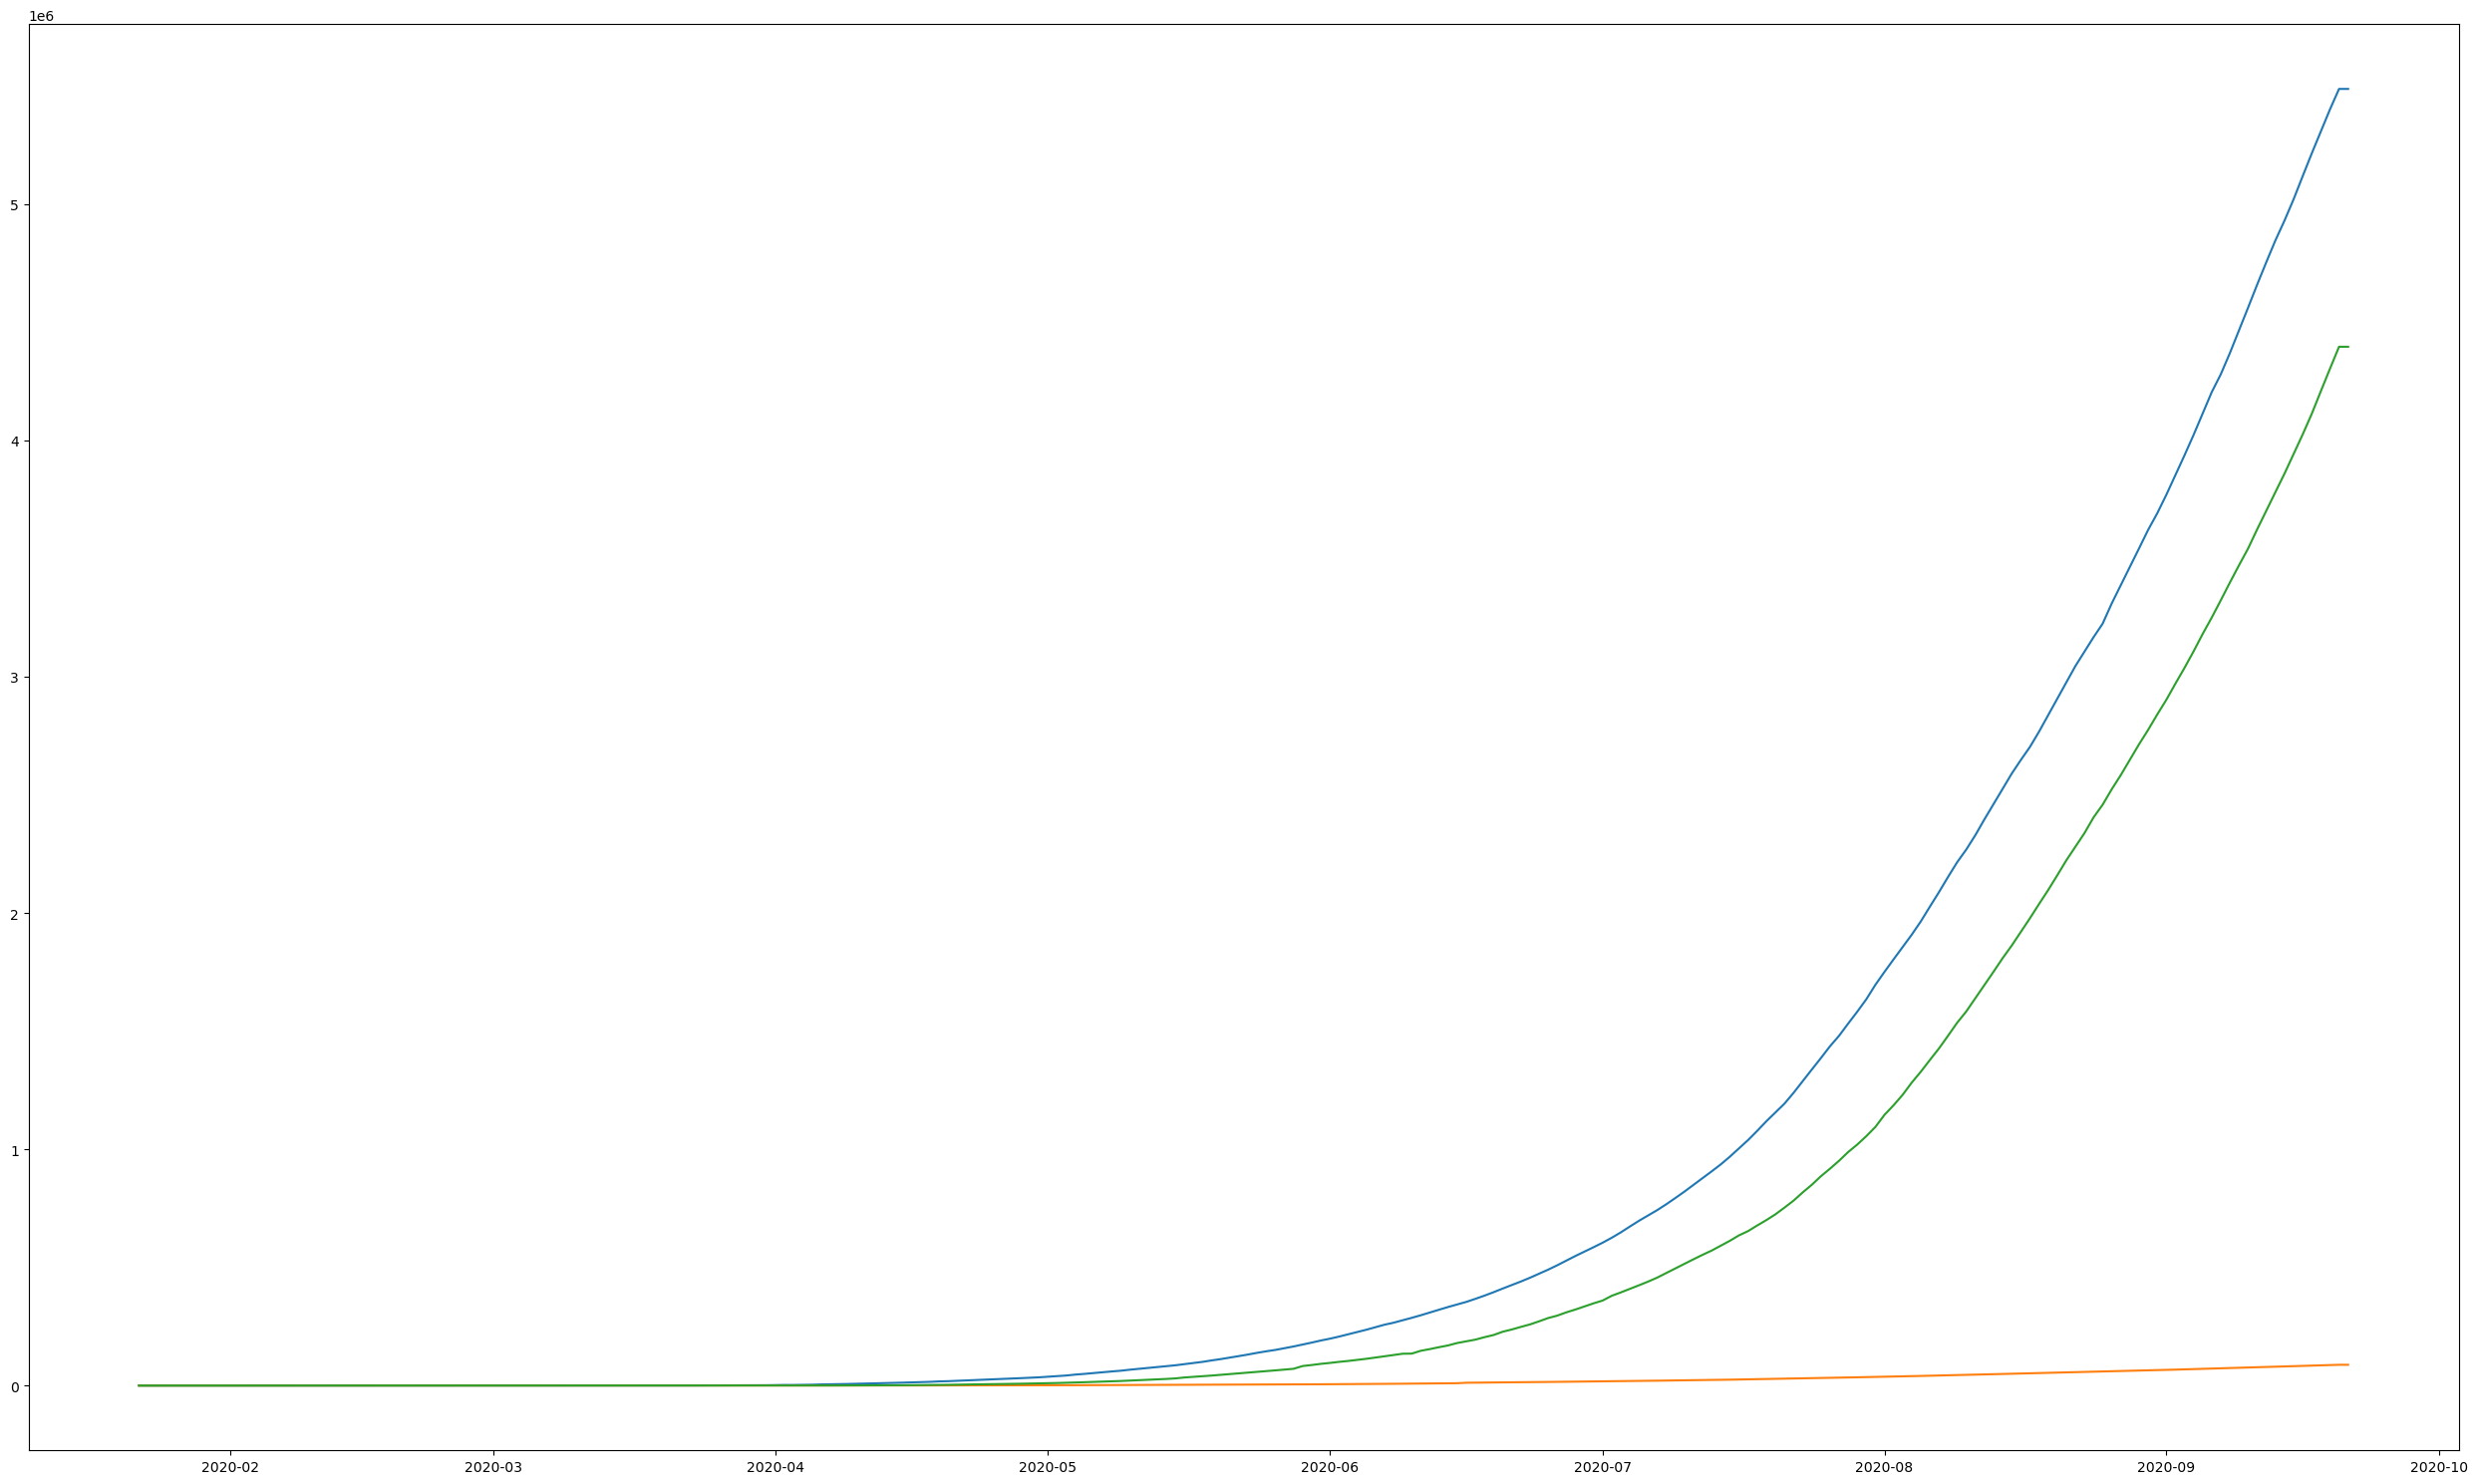

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15),facecolor='white')#canvas  size
plt.plot(india)#line plot 
plt.tight_layout()

In [41]:
## Plotting the autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

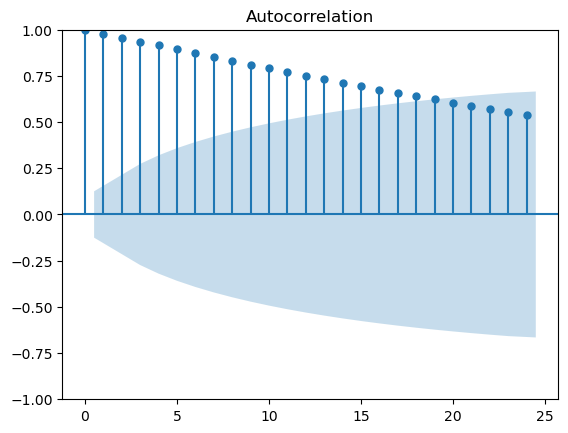

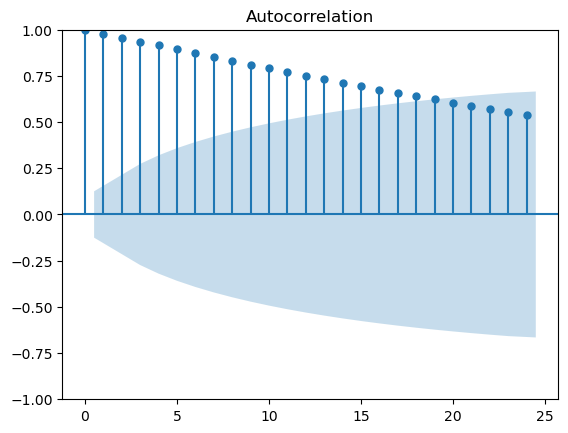

In [42]:
plot_acf(df)

In [43]:
## making it stationary by taking difference of 1
data=df.diff(periods=1)

In [44]:
data

2020-01-22      NaN
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2020-09-17    96424
2020-09-18    93337
2020-09-19    92605
2020-09-20    86961
2020-09-21        0
Name: confirmed, Length: 244, dtype: object

In [45]:
data1=data.iloc[1:]
data1

2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
2020-01-27        0
              ...  
2020-09-17    96424
2020-09-18    93337
2020-09-19    92605
2020-09-20    86961
2020-09-21        0
Name: confirmed, Length: 243, dtype: object

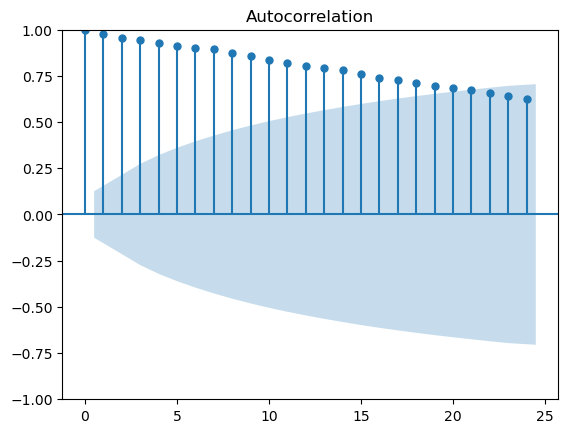

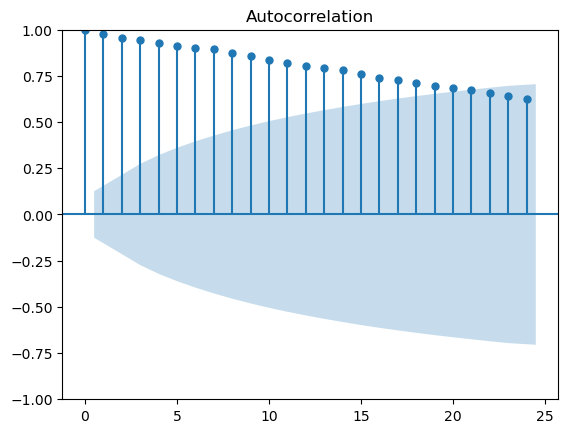

In [46]:
plot_acf(data1)

In [47]:
data2=data1.diff(periods=1)
data2

2020-01-23       NaN
2020-01-24         0
2020-01-25         0
2020-01-26         0
2020-01-27         0
               ...  
2020-09-17     -1470
2020-09-18     -3087
2020-09-19      -732
2020-09-20     -5644
2020-09-21    -86961
Name: confirmed, Length: 243, dtype: object

In [48]:
data3=data2.iloc[1:]

In [49]:
data3

2020-01-24         0
2020-01-25         0
2020-01-26         0
2020-01-27         0
2020-01-28         0
               ...  
2020-09-17     -1470
2020-09-18     -3087
2020-09-19      -732
2020-09-20     -5644
2020-09-21    -86961
Name: confirmed, Length: 242, dtype: object

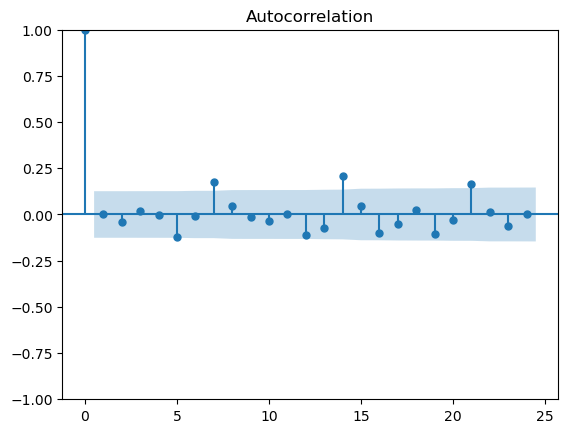

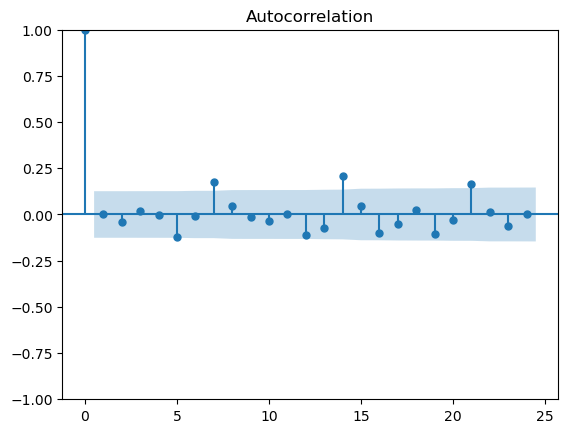

In [50]:
plot_acf(data3)

In [51]:
data3.shape

(242,)

In [52]:
## Creating training and test sets
train=data3[:200]
test=data3[200:]

In [56]:
train.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 200 entries, 2020-01-24 to 2020-08-10
Series name: confirmed
Non-Null Count  Dtype  
--------------  -----  
200 non-null    float32
dtypes: float32(1)
memory usage: 2.3 KB


In [55]:
train=train.astype('float32')

In [54]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [57]:
## Applying autoregressive model
from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

#from statsmodels.tsa import ar_model
#from ar_model import AutoReg

In [58]:
from statsmodels.tsa.ar_model import AutoReg

In [59]:
import statsmodels

In [60]:
## model creation
ar_model=statsmodels.tsa.ar_model.AutoReg(train,lags=4) ## object creation
ar_model_fit=ar_model.fit()#traing model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
##making prediction
prediction=ar_model_fit.predict(start=200,end=242)

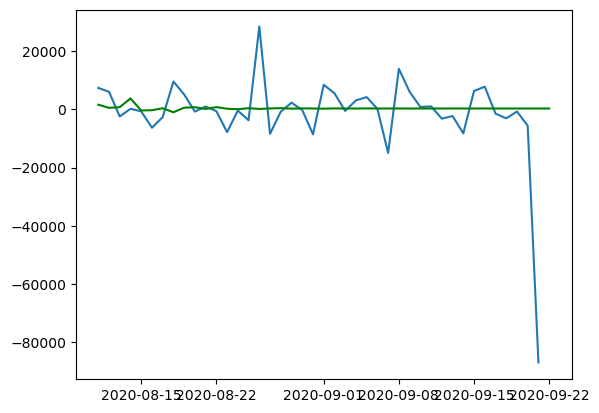

In [63]:
import matplotlib.pyplot as plt

plt.plot(test)
plt.plot(prediction,color='green')#graph of test vs prediction

## ARIMA Model

In [64]:
## importing the library
from statsmodels.tsa.arima_model import ARIMA

In [65]:
##Model object creation and fitting the model
import statsmodels.api as sm
model_arima = sm.tsa.ARIMA(train, order=(1,1,0))#order= p,d,q

model_arima_fit = model_arima.fit()#training

In [66]:
## evaluate the model
print(model_arima_fit.aic)

3595.273276056055


In [67]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=15)

In [68]:
predictions

2020-08-11   -5610.092807
2020-08-12   -6938.271569
2020-08-13   -6319.934306
2020-08-14   -6607.802913
2020-08-15   -6473.784894
2020-08-16   -6536.177350
2020-08-17   -6507.130371
2020-08-18   -6520.653272
2020-08-19   -6514.357649
2020-08-20   -6517.288593
2020-08-21   -6515.924084
2020-08-22   -6516.559335
2020-08-23   -6516.263592
2020-08-24   -6516.401276
2020-08-25   -6516.337177
Freq: D, Name: predicted_mean, dtype: float64

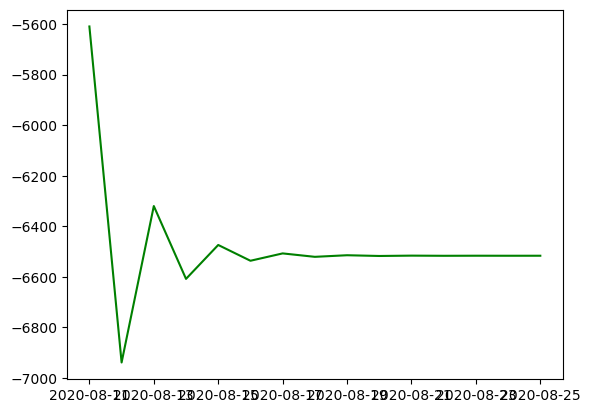

In [69]:
## plotting the forecasted values
plt.plot(predictions,color='green')

In [70]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))# is used to find the cartesian product from the given iterator,
# output is lexicographic ordered.
pdq#number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [71]:
##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
for params in pdq:#iterating params over pdq
    try:
        model_arima = sm.tsa.ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
    except:
        continue
#take lowest aic score        

(0, 0, 0) 3528.106512492299
(0, 0, 1) 3529.7486749104614
(0, 0, 2) 3526.264708737812
(0, 0, 3) 3527.297696456283
(0, 0, 4) 3509.61102747429
(0, 1, 0) 3639.903426959604
(0, 1, 1) 3516.238880091819
(0, 1, 2) 3514.2483137092486
(0, 1, 3) 3484.7746071758484
(0, 1, 4) 3486.751842559326
(0, 2, 0) 3830.7114483083556
(0, 2, 1) 3628.8668192185223
(0, 2, 2) 3507.1912719101974
(0, 2, 3) 3507.5998973927326
(0, 2, 4) 3477.9511955583666
(0, 3, 0) 4045.460289274676
(0, 3, 1) 3818.314148478219
(0, 3, 2) 3624.2198595867194
(0, 3, 3) 3501.3603442528
(0, 3, 4) 3549.2235488240094
(0, 4, 0) 4265.743047475942
(0, 4, 1) 4031.912282922168
(0, 4, 2) 3812.189257465061
(0, 4, 3) 3615.6619524042626
(0, 4, 4) 3665.3820191011637
(1, 0, 0) 3529.8051988470743
(1, 0, 1) 3529.8510533002955
(1, 0, 2) 3514.952491947329
(1, 0, 3) 3516.529036033464
(1, 0, 4) 3510.796591913003
(1, 1, 0) 3595.273276056055
(1, 1, 1) 3514.8425725438065
(1, 1, 2) 3502.906118009704
(1, 1, 3) 3486.7415997183116
(1, 1, 4) 3478.7087006581414
(1, 2,

In [72]:
## create the final model with lowest aic score parameter
model_arima = sm.tsa.ARIMA(train, order=(4, 1, 2))

model_arima_fit = model_arima.fit()#training

In [73]:
print(model_arima_fit.aic)#aic score

3405.173929050854


In [74]:
forecast = model_arima_fit.forecast(steps=20)

In [75]:
forecast

2020-08-11    4684.226012
2020-08-12    3850.192405
2020-08-13    3150.722268
2020-08-14    5632.201708
2020-08-15   -2461.991798
2020-08-16   -4503.327044
2020-08-17   -1772.742182
2020-08-18    -945.064766
2020-08-19    4053.815596
2020-08-20    5848.630046
2020-08-21    2363.622461
2020-08-22    -363.868757
2020-08-23   -3335.640569
2020-08-24   -3690.959471
2020-08-25     135.324859
2020-08-26    3407.649283
2020-08-27    4772.694831
2020-08-28    3532.716536
2020-08-29    -349.879393
2020-08-30   -3176.039477
Freq: D, Name: predicted_mean, dtype: float64

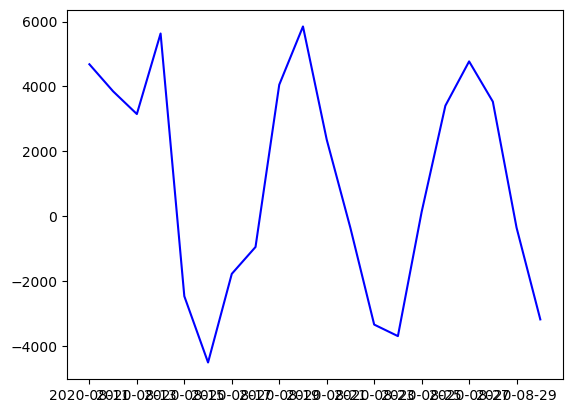

In [76]:
plt.plot(forecast,color='blue')#line plot for prediction